In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import poisson
k= np.arange(10)
lam =1.4
dist = poisson(lam)

In [3]:
from empiricaldist import Pmf

def poisson_pmf(lam, qs):
    ps = poisson(lam).pmf(qs)
    pmf = Pmf(ps, qs)
    pmf.normalize()
    return pmf

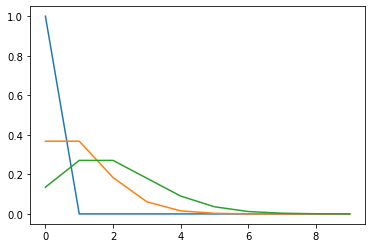

In [12]:
for i in range(3): #linspace로 해서 시도해보기 # asymmetrical distribution
    lam = i
    pmf_goals = poisson_pmf(lam,k)
    plt.plot(pmf_goals)
    plt.show

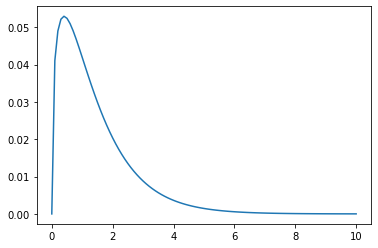

In [4]:
from scipy.stats import gamma 
 # => lamda의 분포를 알게 함 ; prior
alpha = 1.4
qs = np.linspace(0,10,101)
ps = gamma(alpha).pdf(qs)

prior=Pmf(ps,qs)
prior.normalize()
plt.plot(prior)
plt.show()

In [5]:
def update_poisson(pmf, given_goal):
    k = given_goal
    lams = pmf.qs
    likelihood = poisson(lams).pmf(k)
    pmf *= likelihood
    pmf.normalize()
    plt.plot(pmf)

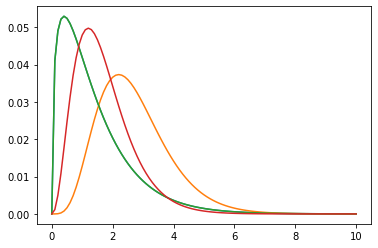

In [6]:
france = prior.copy()
plt.plot(prior)
update_poisson(france, 4)

croatia = prior.copy()
plt.plot(prior)
update_poisson(croatia, 2)

plt.show()

In [8]:
#To-do
# Mixture model 만들어서 win/lose prediction 하기(pmf_produce._gt)
pmf_seq = [poisson_pmf(lam, k) 
           for lam in prior.qs]

In [9]:
from utils import make_mixture

pred_france = make_mixture(france, pmf_seq)
pred_croatia = make_mixture(croatia, pmf_seq)

ModuleNotFoundError: No module named 'utils'

In [10]:
def expo_pdf(t, lam):
    return lam * np.exp(-lam * t)

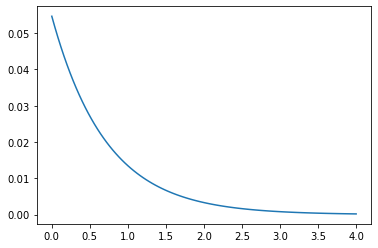

In [11]:
lam = 1.4
qs = np.linspace(0, 4, 101)
ps = expo_pdf(qs, lam)
pmf_time = Pmf(ps, qs)
pmf_time.normalize()

plt.plot(pmf_time)